# CUBE & ROLLUP

## Beispiel 1: Vorbereitung

In [15]:
USE MASTER
Go
DROP DATABASE IF EXISTS CUBE1DB
GO
CREATE DATABASE CUBE1DB
GO 
USE CUBE1DB
GO

CREATE TABLE [dbo].[StudentInformation](
	[LV] [nvarchar](50) NULL,
	[Student] [nvarchar](50) NULL,
	[Punkte] [int] NULL
) 
INSERT INTO [dbo].[StudentInformation]([LV],[Student],[Punkte]) Values ('LV 1','Student 1',19)
--INSERT INTO [dbo].[StudentInformation]([LV],[Student],[Punkte]) Values ('LV 1','Student 1',1)
INSERT INTO [dbo].[StudentInformation]([LV],[Student],[Punkte]) Values ('LV 1','Student 2',13)
INSERT INTO [dbo].[StudentInformation]([LV],[Student],[Punkte]) Values ('LV 1','Student 3',11)
INSERT INTO [dbo].[StudentInformation]([LV],[Student],[Punkte]) Values ('LV 2','Student 1',9)
INSERT INTO [dbo].[StudentInformation]([LV],[Student],[Punkte]) Values ('LV 2','Student 2',29)
INSERT INTO [dbo].[StudentInformation]([LV],[Student],[Punkte]) Values ('LV 2','Student 3',7)
INSERT INTO [dbo].[StudentInformation]([LV],[Student],[Punkte]) Values ('LV 3','Student 1',3)
INSERT INTO [dbo].[StudentInformation]([LV],[Student],[Punkte]) Values ('LV 3','Student 2',12)
INSERT INTO [dbo].[StudentInformation]([LV],[Student],[Punkte]) Values ('LV 3','Student 3',11)
INSERT INTO [dbo].[StudentInformation]([LV],[Student],[Punkte]) Values ('LV 4','Student 1',5)
INSERT INTO [dbo].[StudentInformation]([LV],[Student],[Punkte]) Values ('LV 4','Student 2',17)

Select * from [dbo].[StudentInformation]

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

(11 rows affected)

Total execution time: 00:00:00.290

LV,Student,Punkte
LV 1,Student 1,19
LV 1,Student 2,13
LV 1,Student 3,11
LV 2,Student 1,9
LV 2,Student 2,29
LV 2,Student 3,7
LV 3,Student 1,3
LV 3,Student 2,12
LV 3,Student 3,11
LV 4,Student 1,5


In [2]:
GO 
USE CUBE1DB

Commands completed successfully.

Total execution time: 00:00:00

# Rollup

benötigt man die Aggregation der Werte und zusätzlich die Aggregation eines Teiles (entweder LV oder Student) sowie die Gesamt-Aggregation =\> ROLLUP

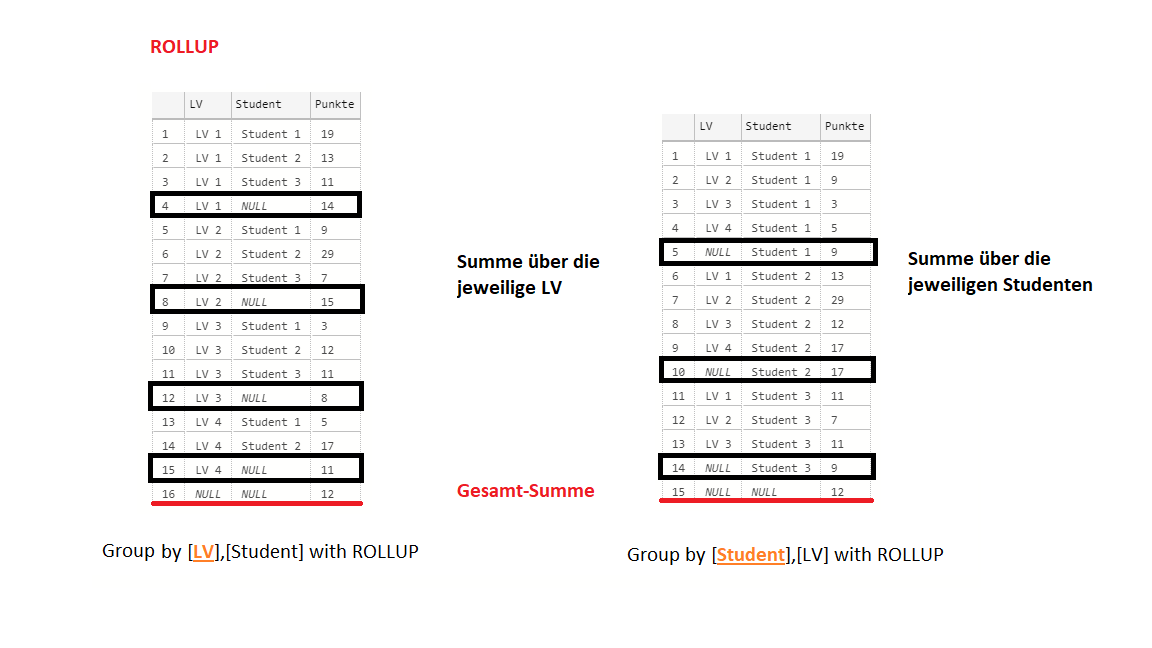

In [16]:
Select [LV],[Student],SUM([Punkte]) as [Punkte] from  [dbo].[StudentInformation]
Group by [LV],[Student] with ROLLUP

(16 rows affected)

Total execution time: 00:00:00.012

LV,Student,Punkte
LV 1,Student 1,19
LV 1,Student 2,13
LV 1,Student 3,11
LV 1,NULL,43
LV 2,Student 1,9
LV 2,Student 2,29
LV 2,Student 3,7
LV 2,NULL,45
LV 3,Student 1,3
LV 3,Student 2,12


In [17]:
Select [LV],[Student],AVG([Punkte]) as [Punkte] from  [dbo].[StudentInformation]
Group by ROLLUP ([LV],[Student])

(16 rows affected)

Total execution time: 00:00:00.013

LV,Student,Punkte
LV 1,Student 1,19
LV 1,Student 2,13
LV 1,Student 3,11
LV 1,NULL,14
LV 2,Student 1,9
LV 2,Student 2,29
LV 2,Student 3,7
LV 2,NULL,15
LV 3,Student 1,3
LV 3,Student 2,12


In [ ]:
Select [LV],[Student],AVG([Punkte]) as [AVG], Sum(Punkte) as [Sum] from  [dbo].[StudentInformation]
Group by ROLLUP ([LV],[Student])

In [ ]:
Select [LV],[Student],AVG([Punkte]) as [Punkte] ,
GROUPING_ID( [LV],[Student]) as GroupingID 
from  [dbo].[StudentInformation]
Group by [LV],[Student] with ROLLUP

In [ ]:
Select [LV],[Student],AVG([Punkte]) as [Punkte] from  [dbo].[StudentInformation]
Group by [Student],[LV] with ROLLUP

# CUBE

\= ist die Kombination der beiden oben beschriebenen Rollup Funktionen

In [22]:
Select [LV],[Student],AVG([Punkte]) as [Punkte] from  [dbo].[StudentInformation]
Group by [LV],[Student] with CUBE

(19 rows affected)

Total execution time: 00:00:00.025

LV,Student,Punkte
LV 1,Student 1,19
LV 2,Student 1,9
LV 3,Student 1,3
LV 4,Student 1,5
NULL,Student 1,9
LV 1,Student 2,13
LV 2,Student 2,29
LV 3,Student 2,12
LV 4,Student 2,17
NULL,Student 2,17


In [23]:
Select [LV],[Student],AVG([Punkte]) as [Punkte] from  [dbo].[StudentInformation]
Group by ROLLUP ([LV],[Student])
UNION
Select [LV],[Student],AVG([Punkte]) as [Punkte] from  [dbo].[StudentInformation]
Group by ROLLUP ([Student],[LV])

(19 rows affected)

Total execution time: 00:00:00.018

LV,Student,Punkte
NULL,NULL,12
NULL,Student 1,9
NULL,Student 2,17
NULL,Student 3,9
LV 1,NULL,14
LV 1,Student 1,19
LV 1,Student 2,13
LV 1,Student 3,11
LV 2,NULL,15
LV 2,Student 1,9


In [ ]:
Select [LV],[Student],AVG([Punkte]) as [Punkte] from  [dbo].[StudentInformation]
Group by CUBE([LV],[Student])

In [ ]:
Select [LV],[Student],AVG([Punkte]) as [Punkte] ,
GROUPING_ID( [LV],[Student]) as GroupingID 
from  [dbo].[StudentInformation]
Group by [LV],[Student] with CUBE

# GROUPING SETS

\= die Möglichkeit ausgewählte Aggregierungen zu bekommen

In [6]:
-- keine Aggregierungen
SELECT [LV],[Student],AVG([Punkte]) as [Punkte] ,
GROUPING_ID( [LV],[Student]) as GroupingID 
FROM [dbo].[StudentInformation] 
GROUP BY GROUPING SETS(([LV], [Student])) 

(11 rows affected)

Total execution time: 00:00:00.039

LV,Student,Punkte,GroupingID
LV 1,Student 1,10,0
LV 2,Student 1,9,0
LV 3,Student 1,3,0
LV 4,Student 1,5,0
LV 1,Student 2,13,0
LV 2,Student 2,29,0
LV 3,Student 2,12,0
LV 4,Student 2,17,0
LV 1,Student 3,11,0
LV 2,Student 3,7,0


In [24]:
-- liefert nur Aggregierung für Studenten + LV
SELECT [LV],[Student],AVG([Punkte]) as [Punkte] ,
GROUPING_ID( [LV],[Student]) as GroupingID 
FROM [dbo].[StudentInformation] 
GROUP BY GROUPING SETS([LV],[Student]) 

(7 rows affected)

Total execution time: 00:00:00.018

LV,Student,Punkte,GroupingID
NULL,Student 1,9,2
NULL,Student 2,17,2
NULL,Student 3,9,2
LV 1,NULL,14,1
LV 2,NULL,15,1
LV 3,NULL,8,1
LV 4,NULL,11,1


In [ ]:
-- mehrere Kombinierbar
SELECT [LV],[Student],AVG([Punkte]) as [Punkte] ,
GROUPING_ID( [LV],[Student]) as GroupingID 
FROM [dbo].[StudentInformation] 
--GROUP BY GROUPING SETS([LV], [Student],([LV], [Student]),()) 
GROUP BY GROUPING SETS(([LV], [Student]),()) 

In [ ]:
-- auch kombinierbar mit Rollup and Cube
SELECT [LV],[Student],AVG([Punkte]) as [Punkte] ,
GROUPING_ID( [LV],[Student]) as GroupingID 
FROM [dbo].[StudentInformation] 
GROUP BY GROUPING SETS(CUBE([LV], [Student])) 